In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from brute_stratum import *
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def get_label(s_tuple):
    stratum = ''
    for c in s_tuple:
        stratum += f'{c[0]}'
        if c[1] != 1:
            stratum += f'^{c[1]} '
        else:
            stratum += ' '

    return f'({stratum[:-1]})'

In [6]:
unfixed, fixed, results = compare_fixed_unfixed(1000, genus=True, num_samples=1000000)

In [8]:
u = list(unfixed.items())
u.sort(key = lambda x:x[1],reverse=True)
u

[(497, 308396),
 (498, 299281),
 (496, 173224),
 (499, 128088),
 (495, 59754),
 (500, 14945),
 (494, 13778),
 (493, 2228),
 (492, 277),
 (491, 29),
 (490, 0)]

In [10]:
f = list(fixed.items())
f.sort(key = lambda x:x[1], reverse=True)
f

[(497, 308038),
 (498, 299972),
 (496, 172936),
 (499, 128153),
 (495, 59771),
 (500, 15011),
 (494, 13610),
 (493, 2219),
 (492, 260),
 (491, 27),
 (490, 3)]

In [44]:
diff = list(results.values())
diff.sort(reverse=True)
diff[:10]

[72, 51, 48, 44, 43, 35, 34, 31, 30, 29]

In [9]:
stratums = get_stratums_sample(100, fixed=False)

In [5]:
def expected_val(vals, num_samples):
    expected = 0
    for val, sample in vals:
        expected += val*sample/num_samples
    
    return round(expected, 2)



In [6]:
num_samples= 10000
results = {}
for i in range(100,151):
    unfixed, fixed, _ = compare_fixed_unfixed(i, genus=True, num_samples=num_samples)

    results[i] = (expected_val(list(unfixed.items()), num_samples),expected_val(list(fixed.items()), num_samples))


In [8]:
r = list(results.items()) # col 1: genus, col 2: unfixed, col 3: fixed

In [12]:
n, g = zip(*r)
g_unfixed, g_fixed = zip(*g)

In [16]:
x = [i for i in range(100,151)]
y = [i/2 for i in range(100, 151)]

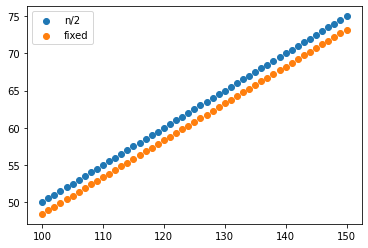

In [17]:
# plt.scatter(n, g_unfixed, label = "unfixed")
plt.scatter(x, y, label = "n/2")
plt.scatter(n, g_fixed, label = "fixed")
plt.legend()
plt.show()